#       Gramener Case Study
###       By : Balakrishna Gadiyar, Deepak Kumar Padhan, Bishnu Agrawal
####        Problem Statement - 

Introduction
Solving this case study will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

 



In [210]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [211]:
# Import the numpy,pandas and matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Data Source - Load the loan csv file.

loan = pd.read_csv('loan.csv',sep=",")

# Verify the uploaded Data frame
loan.head(25)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [213]:
# Data Source Analysis - Check the dataframe structure
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [214]:
# Data Analysis - Investigage the shape
loan.shape

(39717, 111)

In [215]:
#Data Analysis- Describe the dataframe
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Analysis - 
#### Looking at the null value analysis, Following fields can be made important and can be considered for driver variables -

  1. annual_inc -->	The self-reported annual income provided by the borrower during registration.
  2. dti --> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
  3. emp_length --> 	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
  4. funded_amnt -->The total amount committed to that loan at that point in time.
  5. grade --> LC assigned loan grade
  6. home_ownership-->The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
  7. int_rate --> Interest Rate on the loan
  8. loan_amnt -->The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
  9. loan_status --> Current status of the loan
  10. purpose -> A category provided by the borrower for the loan request.
  11. emp_title --> The job title supplied by the Borrower when applying for the loan.
  12. term --> The number of payments on the loan. Values are in months and can be either 36 or 60.


In [216]:
#Dropping columns that are not required for analysis, this can be done by picking only the columns that are needed
loan_master=loan[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','emp_title','emp_length','home_ownership','annual_inc','issue_d','loan_status','purpose','zip_code','addr_state','dti','total_pymnt','total_rec_prncp','total_rec_int']]   
loan_master.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,total_pymnt,total_rec_prncp,total_rec_int
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,24000.0,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,5863.155187,5000.00,863.16
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,30000.0,Dec-11,Charged Off,car,309xx,GA,1.00,1008.710000,456.46,435.17
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,12252.0,Dec-11,Fully Paid,small_business,606xx,IL,8.72,3005.666844,2400.00,605.67
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,49200.0,Dec-11,Fully Paid,other,917xx,CA,20.00,12231.890000,10000.00,2214.92
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,University Medical Group,1 year,...,80000.0,Dec-11,Current,other,972xx,OR,17.94,3513.330000,2475.94,1037.39
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,36000.0,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,5632.210000,5000.00,632.21
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,Southern Star Photography,8 years,...,47004.0,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,10110.840000,6985.61,3125.23
7,1072053,3000,3000,3000.0,36 months,18.64%,109.43,E,MKC Accounting,9 years,...,48000.0,Dec-11,Fully Paid,car,900xx,CA,5.35,3939.135294,3000.00,939.14
8,1071795,5600,5600,5600.0,60 months,21.28%,152.39,F,NaN,4 years,...,40000.0,Dec-11,Charged Off,small_business,958xx,CA,5.55,646.020000,162.02,294.94
9,1071570,5375,5375,5350.0,60 months,12.69%,121.45,B,Starbucks,< 1 year,...,15000.0,Dec-11,Charged Off,other,774xx,TX,18.08,1476.190000,673.48,533.42


In [217]:
#Droping rows that has values as NA for driver columns
loan_master=loan_master[~((loan_master['emp_length'] == 'n/a') )]
loan_master.shape

(39717, 21)

In [218]:
#Data Validation - Removing fully paid rows the current focus is to future prediction
loan_master=loan_master[~((loan_master['loan_status'] == 'Fully Paid') )]
loan_master.shape

(6767, 21)

In [219]:
# Data Validation - Removing % from interest rate column
loan_master['int_rate']=loan_master['int_rate'].str.replace("%","",case=False)
# Data Validation - Removing special chars from employee title column
loan_master['emp_title']=loan_master['emp_title'].str.replace("-","",case=False)
loan_master['emp_title']=loan_master['emp_title'].str.replace("?","")
loan_master['emp_title']=loan_master['emp_title'].str.replace("#","",case=False)
loan_master['emp_title']=loan_master['emp_title'].str.replace(",","",case=False)
loan_master['emp_title']=loan_master['emp_title'].str.replace("/"," ",case=False)
# Data Validation - Removing char from employee Length column
loan_master['emp_length']=loan_master['emp_length'].str.replace("years","",case=False)
loan_master['emp_length']=loan_master['emp_length'].str.replace("<","",case=False)
loan_master['emp_length']=loan_master['emp_length'].str.replace("year","",case=False)
loan_master['emp_length']=loan_master['emp_length'].str.replace("+","")

loan_master.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,total_pymnt,total_rec_prncp,total_rec_int
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,1,...,30000.0,Dec-11,Charged Off,car,309xx,GA,1.00,1008.71,456.46,435.17
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1,...,80000.0,Dec-11,Current,other,972xx,OR,17.94,3513.33,2475.94,1037.39
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,NaN,4,...,40000.0,Dec-11,Charged Off,small_business,958xx,CA,5.55,646.02,162.02,294.94
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,Starbucks,1,...,15000.0,Dec-11,Charged Off,other,774xx,TX,18.08,1476.19,673.48,533.42
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,Va. Dept of Conservation Recreation,1,...,30000.0,Dec-11,Charged Off,debt_consolidation,245xx,VA,10.08,2270.70,1256.14,570.26
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,SFMTA,3,...,100000.0,Dec-11,Charged Off,other,951xx,CA,7.06,7471.99,5433.47,1393.42
21,1039153,21000,21000,21000.0,36 months,12.42,701.73,B,Osram Sylvania,10,...,105000.0,Dec-11,Charged Off,debt_consolidation,335xx,FL,13.22,14025.40,10694.96,3330.44
24,1069559,6000,6000,6000.0,36 months,11.71,198.46,B,bmgeducational,1,...,76000.0,Dec-11,Charged Off,major_purchase,900xx,CA,2.40,2050.14,1305.58,475.25
26,1069800,15000,15000,8725.0,36 months,14.27,514.64,C,nyc transit,9,...,60000.0,Dec-11,Charged Off,debt_consolidation,103xx,NY,15.22,0.00,0.00,0.00
27,1069657,5000,5000,5000.0,60 months,16.77,123.65,D,Frito Lay,2,...,50004.0,Dec-11,Charged Off,other,150xx,PA,13.97,1609.12,629.05,719.11


In [220]:
# Data Validation - Validating unique entities assuming id as key field
loan_master['id'].nunique()
loan_master.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,annual_inc,issue_d,loan_status,purpose,zip_code,addr_state,dti,total_pymnt,total_rec_prncp,total_rec_int
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,1,...,30000.0,Dec-11,Charged Off,car,309xx,GA,1.00,1008.71,456.46,435.17
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1,...,80000.0,Dec-11,Current,other,972xx,OR,17.94,3513.33,2475.94,1037.39
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,NaN,4,...,40000.0,Dec-11,Charged Off,small_business,958xx,CA,5.55,646.02,162.02,294.94
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,Starbucks,1,...,15000.0,Dec-11,Charged Off,other,774xx,TX,18.08,1476.19,673.48,533.42
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,Va. Dept of Conservation Recreation,1,...,30000.0,Dec-11,Charged Off,debt_consolidation,245xx,VA,10.08,2270.70,1256.14,570.26
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,SFMTA,3,...,100000.0,Dec-11,Charged Off,other,951xx,CA,7.06,7471.99,5433.47,1393.42
21,1039153,21000,21000,21000.0,36 months,12.42,701.73,B,Osram Sylvania,10,...,105000.0,Dec-11,Charged Off,debt_consolidation,335xx,FL,13.22,14025.40,10694.96,3330.44
24,1069559,6000,6000,6000.0,36 months,11.71,198.46,B,bmgeducational,1,...,76000.0,Dec-11,Charged Off,major_purchase,900xx,CA,2.40,2050.14,1305.58,475.25
26,1069800,15000,15000,8725.0,36 months,14.27,514.64,C,nyc transit,9,...,60000.0,Dec-11,Charged Off,debt_consolidation,103xx,NY,15.22,0.00,0.00,0.00
27,1069657,5000,5000,5000.0,60 months,16.77,123.65,D,Frito Lay,2,...,50004.0,Dec-11,Charged Off,other,150xx,PA,13.97,1609.12,629.05,719.11


In [221]:
# column-wise null percentages here
round(100*(loan_master.isnull().sum()/len(loan_master.index)), 2)

id                 0.00
loan_amnt          0.00
funded_amnt        0.00
funded_amnt_inv    0.00
term               0.00
int_rate           0.00
installment        0.00
grade              0.00
emp_title          8.23
emp_length         3.99
home_ownership     0.00
annual_inc         0.00
issue_d            0.00
loan_status        0.00
purpose            0.00
zip_code           0.00
addr_state         0.00
dti                0.00
total_pymnt        0.00
total_rec_prncp    0.00
total_rec_int      0.00
dtype: float64

In [222]:
# summation of rows having any missing values
loan_master.isnull().any(axis=1).sum()

570

In [223]:
# summation of rows having all missing values
loan_master.isnull().all(axis=1).sum()

0

In [224]:
# Data Validation - Check the columns having Null value ..
loan_master.isnull().sum()

id                   0
loan_amnt            0
funded_amnt          0
funded_amnt_inv      0
term                 0
int_rate             0
installment          0
grade                0
emp_title          557
emp_length         270
home_ownership       0
annual_inc           0
issue_d              0
loan_status          0
purpose              0
zip_code             0
addr_state           0
dti                  0
total_pymnt          0
total_rec_prncp      0
total_rec_int        0
dtype: int64

In [225]:
#Data Validation - Replace NAN with meaningfull values. Employee length to be considered as 1 wherever not specified
loan_master['emp_title'].fillna('Not Specified', inplace=True)
loan_master['emp_length'].fillna(1, inplace=True)
# Data Validation - Check the columns having Null value ..
loan_master.isnull().sum()

id                 0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
installment        0
grade              0
emp_title          0
emp_length         0
home_ownership     0
annual_inc         0
issue_d            0
loan_status        0
purpose            0
zip_code           0
addr_state         0
dti                0
total_pymnt        0
total_rec_prncp    0
total_rec_int      0
dtype: int64

In [226]:
# Derive Metrics - Create slots of interest rate - i<10 as low, 10<=i<18 as Medium and i>18 as high

def interest_type(dataframe):
    if  float(dataframe['int_rate']) < 10:
        return "Low"
    if float(dataframe['int_rate']) > 18:
        return "High"
    if (float(dataframe['int_rate']) >= 10) & (float(dataframe['int_rate']) <18):
        return "Medium"

# Applying the function to create new column - slots.  
loan_master['int_type']=loan_master.apply(interest_type,axis=1)
loan_master.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,total_pymnt,total_rec_prncp,total_rec_int,int_type
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,1,...,Dec-11,Charged Off,car,309xx,GA,1.00,1008.71,456.46,435.17,Medium
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1,...,Dec-11,Current,other,972xx,OR,17.94,3513.33,2475.94,1037.39,Medium
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,Not Specified,4,...,Dec-11,Charged Off,small_business,958xx,CA,5.55,646.02,162.02,294.94,High
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,Starbucks,1,...,Dec-11,Charged Off,other,774xx,TX,18.08,1476.19,673.48,533.42,Medium
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,Va. Dept of Conservation Recreation,1,...,Dec-11,Charged Off,debt_consolidation,245xx,VA,10.08,2270.70,1256.14,570.26,Medium
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,SFMTA,3,...,Dec-11,Charged Off,other,951xx,CA,7.06,7471.99,5433.47,1393.42,Medium
21,1039153,21000,21000,21000.0,36 months,12.42,701.73,B,Osram Sylvania,10,...,Dec-11,Charged Off,debt_consolidation,335xx,FL,13.22,14025.40,10694.96,3330.44,Medium
24,1069559,6000,6000,6000.0,36 months,11.71,198.46,B,bmgeducational,1,...,Dec-11,Charged Off,major_purchase,900xx,CA,2.40,2050.14,1305.58,475.25,Medium
26,1069800,15000,15000,8725.0,36 months,14.27,514.64,C,nyc transit,9,...,Dec-11,Charged Off,debt_consolidation,103xx,NY,15.22,0.00,0.00,0.00,Medium
27,1069657,5000,5000,5000.0,60 months,16.77,123.65,D,Frito Lay,2,...,Dec-11,Charged Off,other,150xx,PA,13.97,1609.12,629.05,719.11,Medium


In [227]:
# Derive Metrics - Create slots of employee length - e<=3 as Normal, 3<e<10 as Preferred and e=>10 as Imperia

def employee_type(dataframe):
    if float(dataframe['emp_length']) <= 3:
        return "Normal"
    if float(dataframe['emp_length']) >= 10:
        return "Imperia"
    if (float(dataframe['emp_length']) > 3) & (float(dataframe['emp_length']) <10):
        return "Preferred"
    if dataframe['emp_length'] =='n/a':
        return "Normal"       

# Applying the function to create new column - slots.  
loan_master['emp_type']=loan_master.apply(employee_type,axis=1)
loan_master.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,loan_status,purpose,zip_code,addr_state,dti,total_pymnt,total_rec_prncp,total_rec_int,int_type,emp_type
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,1,...,Charged Off,car,309xx,GA,1.00,1008.71,456.46,435.17,Medium,Normal
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1,...,Current,other,972xx,OR,17.94,3513.33,2475.94,1037.39,Medium,Normal
8,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,Not Specified,4,...,Charged Off,small_business,958xx,CA,5.55,646.02,162.02,294.94,High,Preferred
9,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,Starbucks,1,...,Charged Off,other,774xx,TX,18.08,1476.19,673.48,533.42,Medium,Normal
12,1064687,9000,9000,9000.0,36 months,13.49,305.38,C,Va. Dept of Conservation Recreation,1,...,Charged Off,debt_consolidation,245xx,VA,10.08,2270.70,1256.14,570.26,Medium,Normal
14,1069057,10000,10000,10000.0,36 months,10.65,325.74,B,SFMTA,3,...,Charged Off,other,951xx,CA,7.06,7471.99,5433.47,1393.42,Medium,Normal
21,1039153,21000,21000,21000.0,36 months,12.42,701.73,B,Osram Sylvania,10,...,Charged Off,debt_consolidation,335xx,FL,13.22,14025.40,10694.96,3330.44,Medium,Imperia
24,1069559,6000,6000,6000.0,36 months,11.71,198.46,B,bmgeducational,1,...,Charged Off,major_purchase,900xx,CA,2.40,2050.14,1305.58,475.25,Medium,Normal
26,1069800,15000,15000,8725.0,36 months,14.27,514.64,C,nyc transit,9,...,Charged Off,debt_consolidation,103xx,NY,15.22,0.00,0.00,0.00,Medium,Preferred
27,1069657,5000,5000,5000.0,60 months,16.77,123.65,D,Frito Lay,2,...,Charged Off,other,150xx,PA,13.97,1609.12,629.05,719.11,Medium,Normal


In [228]:
# Data Validation - Check the columns having Null value ..
loan_master.isnull().sum()

id                 0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
installment        0
grade              0
emp_title          0
emp_length         0
home_ownership     0
annual_inc         0
issue_d            0
loan_status        0
purpose            0
zip_code           0
addr_state         0
dti                0
total_pymnt        0
total_rec_prncp    0
total_rec_int      0
int_type           0
emp_type           0
dtype: int64

In [229]:
#Univariate Analysis - interest type wise distribution 
Loan_int_type=loan_master.groupby('int_type')['id'].count()
Loan_int_type

int_type
High      1006
Low        874
Medium    4887
Name: id, dtype: int64

In [230]:
#Univariate Analysis - employee type wise  distribution 
Loan_emp_type=loan_master.groupby('emp_type')['id'].count()
Loan_emp_type

emp_type
Imperia      1722
Normal       2813
Preferred    2232
Name: id, dtype: int64

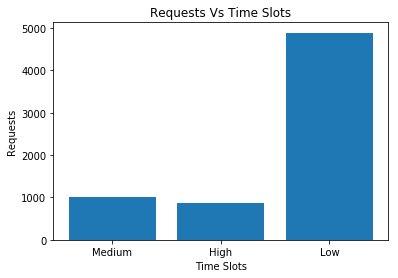

In [232]:
# Data Visualization- Plot requests per interest type using bar chart. 
plt.bar(loan_master.int_type.unique(),Loan_int_type)

# put x and y labels, and the title
plt.xlabel("Interest Rate")
plt.ylabel("Load Request")
plt.title("Loan Distribution based on Intest Types")

plt.show()

# We see that major loan request falls on low interest category

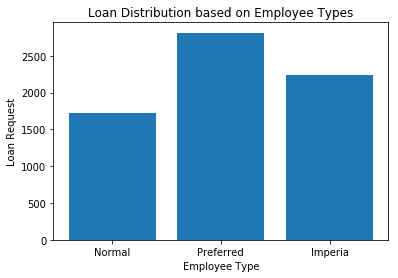

In [259]:
# Data Visualization- Plot requests per employee type using bar chart. 
plt.bar(loan_master.emp_type.unique(),Loan_emp_type)

# put x and y labels, and the title
plt.xlabel("Employee Type")
plt.ylabel("Loan Request")
plt.title("Loan Distribution based on Employee Types")

plt.show()

# We see that major loan request are from preferred or mid career pool which is above 3 years and less than 10 years

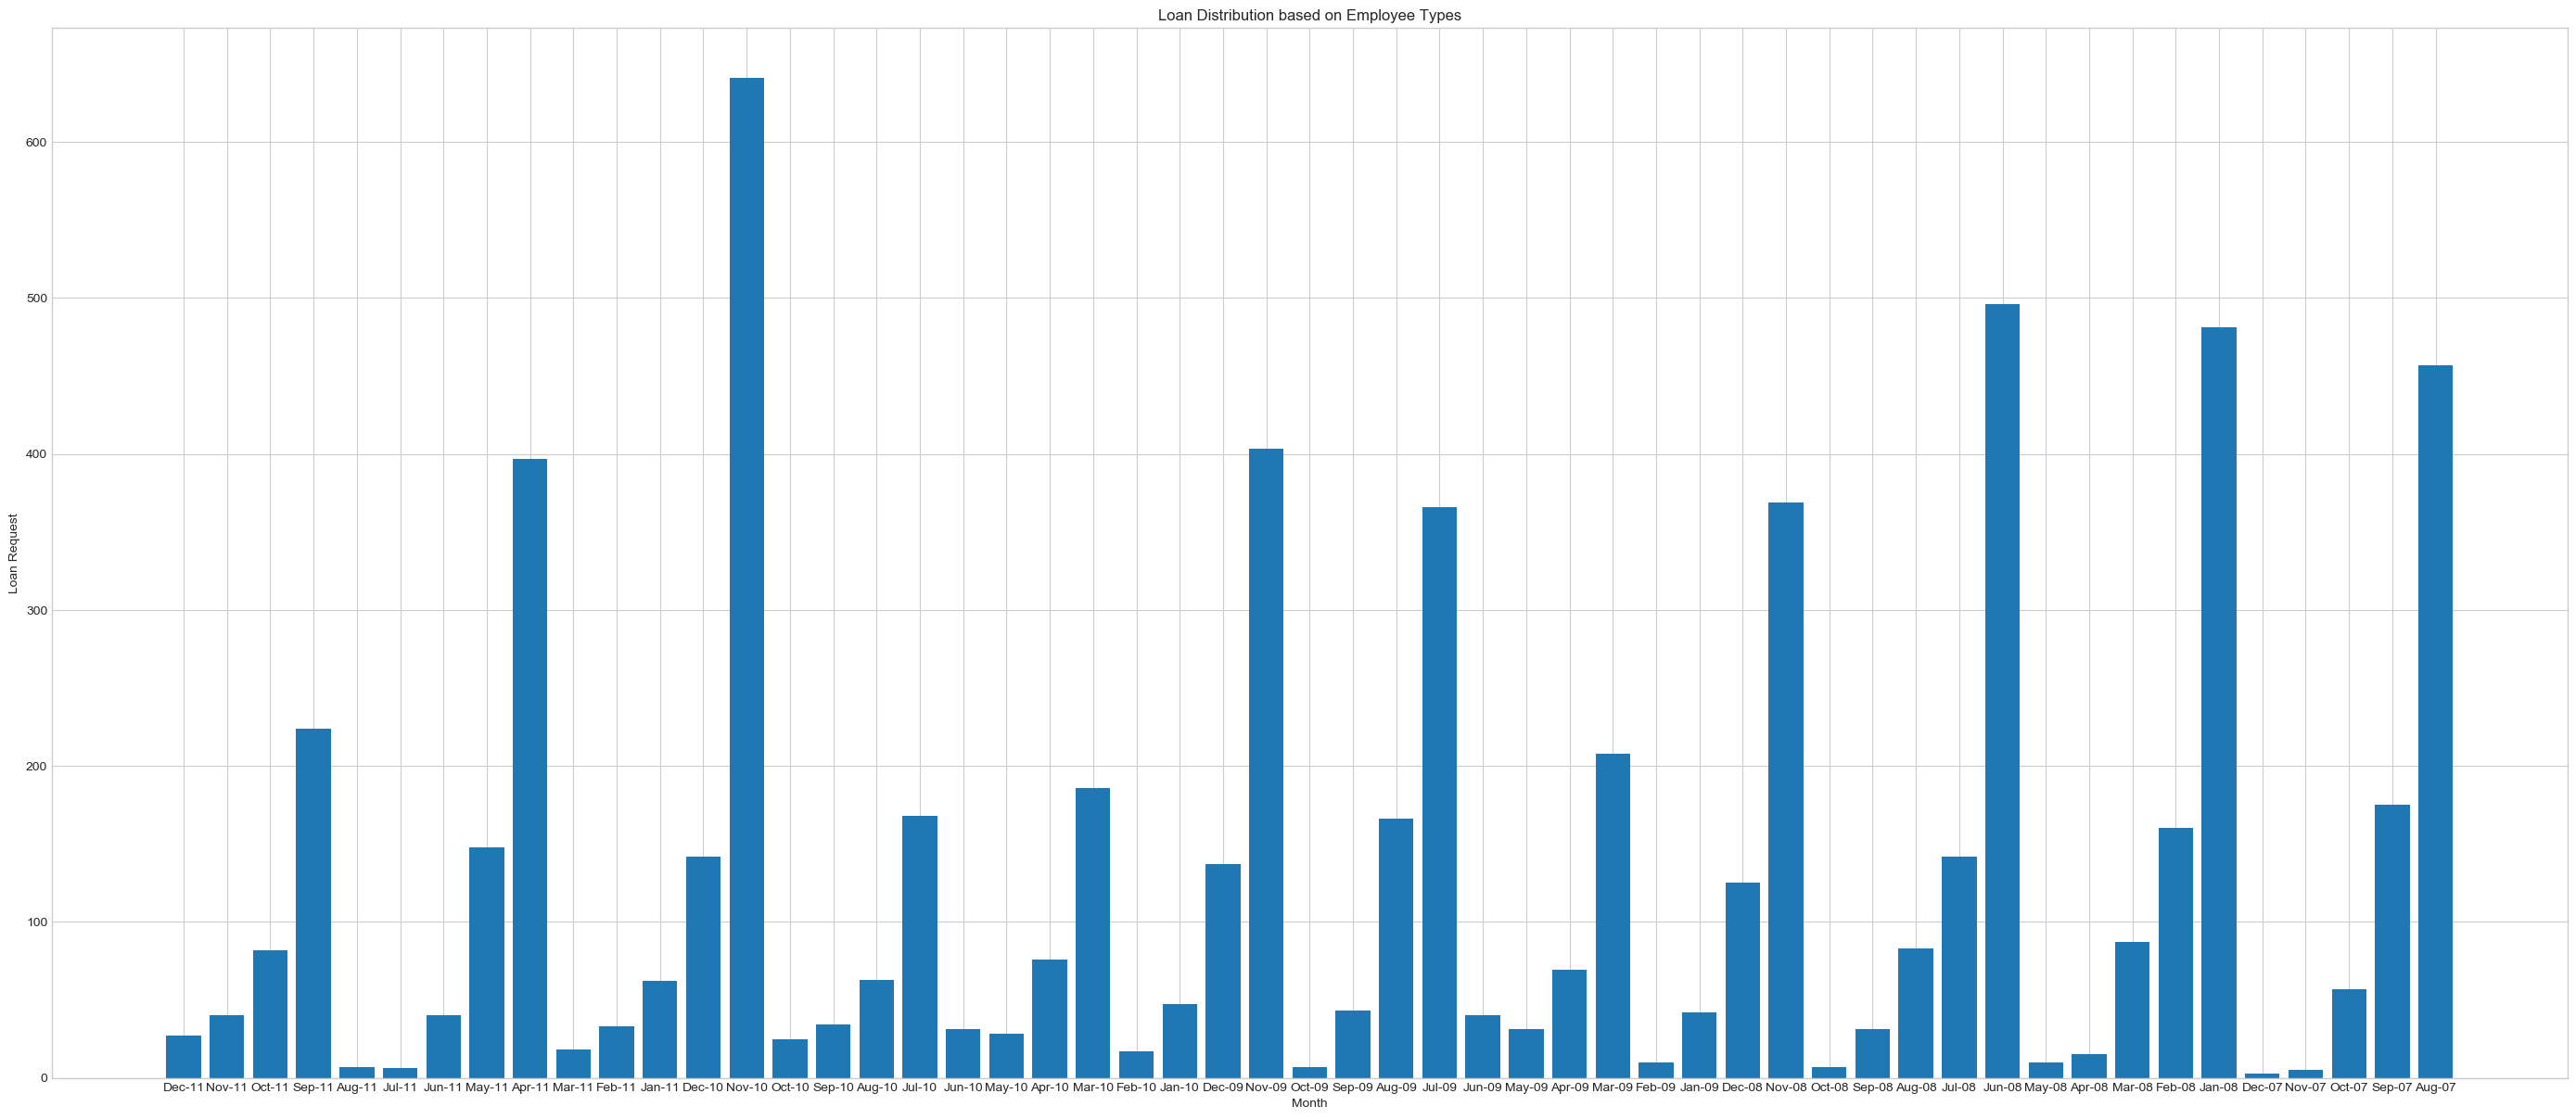

In [261]:
#Box Plot showing distribution of loans with time
loan_per_year=loan_master.groupby('issue_d')['id'].count()
loan_per_year

plt.figure(figsize=(35, 15),dpi=100)
plt.bar(loan_master.issue_d.unique(),loan_per_year)

# put x and y labels, and the title
plt.xlabel("Month")
plt.ylabel("Loan Request")
plt.title("Loan Distribution based on Employee Types")

plt.show()

In [36]:
#Extract data frame for tableau 
loan2Excel=pd.ExcelWriter('loan_master.xlsx')
loan_master.to_excel(loan2Excel,'Sheet1')
loan2Excel.save()